In [1]:
import cv2
import matplotlib.pyplot as plt
import time

In [109]:
url = 'http://78.9.31.140/mjpg/video.mjpg'

In [108]:
%%time
cap = cv2.VideoCapture()
cap.read();
cap.release()

CPU times: user 3.32 ms, sys: 0 ns, total: 3.32 ms
Wall time: 516 ms


In [88]:
cap.read

<function VideoCapture.read>

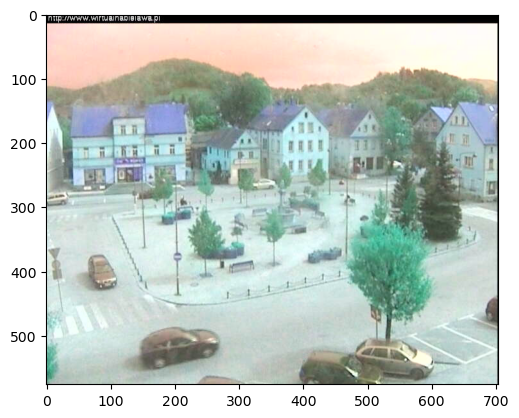

In [87]:
plt.imshow(cap.read()[1])

In [131]:
bytes = b''

In [133]:
import aiohttp
import asyncio


async def main():
    async with aiohttp.ClientSession() as session:
        global bytes
        content_length = None
        async with session.get(url) as resp:
            async for line in resp.content:
                if content_length is not None:
                    if len(bytes) < content_length:
                        bytes += line
                    else:
                        break
                elif b'Content-Length' in line:
                    content_length = int(line.split()[1])



await main()

In [135]:
len(bytes)

47633

In [ ]:
a = bytes.find(b'\xff\xd8')
    b = bytes.find(b'\xff\xd9')

In [593]:
import urllib.request
import numpy as np

In [597]:
stream = urllib.request.urlopen('http://78.9.31.140/mjpg/video.mjpg')

In [624]:
start = time.time()
stream = urllib.request.urlopen('http://78.9.31.140/mjpg/video.mjpg')
bytes = b''
while True:
    bytes += stream.read(frame_byte_size)
    a = bytes.find(b'\xff\xd8')
    b = bytes.find(b'\xff\xd9')
    if a != -1 and b != -1:
        jpg = bytes[a:b+2]
        frame_byte_size = b + 2 - a + 124
        frame = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
        stream.close()
        break
time.time() - start

/tmp/ipykernel_524709/1145676128.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  frame = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)


0.6280953884124756